In [2]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import Callback, ModelCheckpoint
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def signal_to_num(df):
    df.loc[df['Trend']=='Down','Trend'] = 0
    df.loc[df['Trend']=='Up','Trend'] = 1
    return df


In [3]:
datalist = [f for f in glob.glob("stockdataset/*.csv")]
print('have stock = ',len(datalist))

have stock =  444


In [4]:
val_list = []
for val_name in range(441,443):
    df = pd.read_csv(datalist[val_name])
    val_x = df[['MA_n','MACD_n','SIGNAL LINE_n','RSI-7_n','%K_n','%D_n','%R_n','Trading Signal','Trend']]
    val_list.append(val_x)
len(val_list)



2

In [87]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mean_squared_error'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                

In [88]:
checkpoint = ModelCheckpoint('paper1.h5', monitor='mse',save_best_only=True, mode='min')

In [89]:
# for train_name in range(0,440):
df = pd.read_csv(datalist[0])
df = signal_to_num(df)
x_train = df[['MA_n','MACD_n','SIGNAL LINE_n','RSI-7_n','%K_n','%D_n','%R_n','Trading Signal']].values
y_train = df['Trend'].values
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)

r = random.randint(0,1)
val = val_list[r]
val = signal_to_num(val)
x_val = val[['MA_n','MACD_n','SIGNAL LINE_n','RSI-7_n','%K_n','%D_n','%R_n','Trading Signal']].values
x_val=np.asarray(x_val).astype(np.float32)
y_val = val['Trend'].values
y_val=np.asarray(y_val).astype(np.float32)

h = model.fit(x_train, y_train, epochs=500,callbacks=[checkpoint],shuffle=False)

Epoch 1/500
41/41 [==============================] - 0s 877us/step - loss: 0.2295 - mean_squared_error: 0.2295
Epoch 2/500
41/41 [==============================] - 0s 926us/step - loss: 0.1097 - mean_squared_error: 0.1097
Epoch 3/500
41/41 [==============================] - 0s 804us/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 4/500
41/41 [==============================] - 0s 829us/step - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 5/500
41/41 [==============================] - 0s 878us/step - loss: 0.0879 - mean_squared_error: 0.0879
Epoch 6/500
41/41 [==============================] - 0s 902us/step - loss: 0.0834 - mean_squared_error: 0.0834
Epoch 7/500
41/41 [==============================] - 0s 804us/step - loss: 0.0793 - mean_squared_error: 0.0793
Epoch 8/500
41/41 [==============================] - 0s 842us/step - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 9/500
41/41 [==============================] - 0s 804us/step - loss: 0.0718 - mean_squared_error: 0.0718
E

41/41 [==============================] - 0s 853us/step - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 31/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 32/500
41/41 [==============================] - 0s 780us/step - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 33/500
41/41 [==============================] - 0s 756us/step - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 34/500
41/41 [==============================] - 0s 780us/step - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 35/500
41/41 [==============================] - 0s 780us/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 36/500
41/41 [==============================] - 0s 756us/step - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 37/500
41/41 [==============================] - 0s 780us/step - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 38/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 39/

41/41 [==============================] - 0s 804us/step - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 61/500
41/41 [==============================] - 0s 804us/step - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 62/500
41/41 [==============================] - 0s 804us/step - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 63/500
41/41 [==============================] - 0s 804us/step - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 64/500
41/41 [==============================] - 0s 843us/step - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 65/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 66/500
41/41 [==============================] - 0s 853us/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 67/500
41/41 [==============================] - 0s 804us/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 68/500
41/41 [==============================] - 0s 780us/step - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 6

41/41 [==============================] - 0s 731us/step - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 90/500
41/41 [==============================] - 0s 731us/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 91/500
41/41 [==============================] - 0s 780us/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 92/500
41/41 [==============================] - 0s 756us/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 93/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 94/500
41/41 [==============================] - 0s 756us/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 95/500
41/41 [==============================] - 0s 756us/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 96/500
41/41 [==============================] - 0s 756us/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 97/500
41/41 [==============================] - 0s 756us/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 9

41/41 [==============================] - 0s 902us/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 120/500
41/41 [==============================] - 0s 804us/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 121/500
41/41 [==============================] - 0s 999us/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 122/500
41/41 [==============================] - 0s 804us/step - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 123/500
41/41 [==============================] - 0s 756us/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 124/500
41/41 [==============================] - 0s 780us/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 125/500
41/41 [==============================] - 0s 804us/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 126/500
41/41 [==============================] - 0s 829us/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 127/500
41/41 [==============================] - 0s 999us/step - loss: 0.0206 - mean_squared_error: 0.02

41/41 [==============================] - 0s 780us/step - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 149/500
41/41 [==============================] - 0s 780us/step - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 150/500
41/41 [==============================] - 0s 829us/step - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 151/500
41/41 [==============================] - 0s 804us/step - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 152/500
41/41 [==============================] - 0s 756us/step - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 153/500
41/41 [==============================] - 0s 853us/step - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 154/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 155/500
41/41 [==============================] - 0s 780us/step - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 156/500
41/41 [==============================] - 0s 756us/step - loss: 0.0200 - mean_squared_error: 0.0200

41/41 [==============================] - 0s 777us/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 179/500
41/41 [==============================] - 0s 756us/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 180/500
41/41 [==============================] - 0s 780us/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 181/500
41/41 [==============================] - 0s 804us/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 182/500
41/41 [==============================] - 0s 999us/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 183/500
41/41 [==============================] - 0s 780us/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 184/500
41/41 [==============================] - 0s 780us/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 185/500
41/41 [==============================] - 0s 756us/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 186/500
41/41 [==============================] - 0s 780us/step - loss: 0.0194 - mean_squared_error: 0.01

41/41 [==============================] - 0s 756us/step - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 208/500
41/41 [==============================] - 0s 780us/step - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 209/500
41/41 [==============================] - 0s 780us/step - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 210/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 211/500
41/41 [==============================] - 0s 731us/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 212/500
41/41 [==============================] - 0s 756us/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 213/500
41/41 [==============================] - 0s 780us/step - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 214/500
41/41 [==============================] - 0s 756us/step - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 215/500
41/41 [==============================] - 0s 756us/step - loss: 0.0185 - mean_squared_error: 0.0185

41/41 [==============================] - 0s 780us/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 238/500
41/41 [==============================] - 0s 999us/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 239/500
41/41 [==============================] - 0s 756us/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 240/500
41/41 [==============================] - 0s 756us/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 241/500
41/41 [==============================] - 0s 804us/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 242/500
41/41 [==============================] - 0s 756us/step - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 243/500
41/41 [==============================] - 0s 756us/step - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 244/500
41/41 [==============================] - 0s 756us/step - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 245/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0168 - mean_squared_error: 0.0168

41/41 [==============================] - 0s 1ms/step - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 267/500
41/41 [==============================] - 0s 780us/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 268/500
41/41 [==============================] - 0s 780us/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 269/500
41/41 [==============================] - 0s 780us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 270/500
41/41 [==============================] - 0s 799us/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 271/500
41/41 [==============================] - 0s 780us/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 272/500
41/41 [==============================] - 0s 756us/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 273/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 274/500
41/41 [==============================] - 0s 829us/step - loss: 0.0144 - mean_squared_error: 0.0144
E

41/41 [==============================] - 0s 756us/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 297/500
41/41 [==============================] - 0s 780us/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 298/500
41/41 [==============================] - 0s 780us/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 299/500
41/41 [==============================] - 0s 780us/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 300/500
41/41 [==============================] - 0s 951us/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 301/500
41/41 [==============================] - 0s 780us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 302/500
41/41 [==============================] - 0s 804us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 303/500
41/41 [==============================] - 0s 780us/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 304/500
41/41 [==============================] - 0s 731us/step - loss: 0.0124 - mean_squared_error: 0.01

41/41 [==============================] - 0s 780us/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 326/500
41/41 [==============================] - 0s 731us/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 327/500
41/41 [==============================] - 0s 975us/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 328/500
41/41 [==============================] - 0s 780us/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 329/500
41/41 [==============================] - 0s 811us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 330/500
41/41 [==============================] - 0s 853us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 331/500
41/41 [==============================] - 0s 829us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 332/500
41/41 [==============================] - 0s 878us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 333/500
41/41 [==============================] - 0s 756us/step - loss: 0.0122 - mean_squared_error: 0.01

41/41 [==============================] - 0s 975us/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 356/500
41/41 [==============================] - 0s 780us/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 357/500
41/41 [==============================] - 0s 780us/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 358/500
41/41 [==============================] - 0s 756us/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 359/500
41/41 [==============================] - 0s 780us/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 360/500
41/41 [==============================] - 0s 780us/step - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 361/500
41/41 [==============================] - 0s 804us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 362/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 363/500
41/41 [==============================] - 0s 731us/step - loss: 0.0138 - mean_squared_error: 0.0138

41/41 [==============================] - 0s 756us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 385/500
41/41 [==============================] - 0s 756us/step - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 386/500
41/41 [==============================] - 0s 756us/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 387/500
41/41 [==============================] - 0s 999us/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 388/500
41/41 [==============================] - 0s 780us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 389/500
41/41 [==============================] - 0s 780us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 390/500
41/41 [==============================] - 0s 877us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 391/500
41/41 [==============================] - 0s 780us/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 392/500
41/41 [==============================] - 0s 804us/step - loss: 0.0119 - mean_squared_error: 0.01

41/41 [==============================] - 0s 975us/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 415/500
41/41 [==============================] - 0s 756us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 416/500
41/41 [==============================] - 0s 780us/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 417/500
41/41 [==============================] - 0s 804us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 418/500
41/41 [==============================] - 0s 780us/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 419/500
41/41 [==============================] - 0s 780us/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 420/500
41/41 [==============================] - 0s 756us/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 421/500
41/41 [==============================] - 0s 975us/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 422/500
41/41 [==============================] - 0s 780us/step - loss: 0.0133 - mean_squared_error: 0.01

41/41 [==============================] - 0s 731us/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 444/500
41/41 [==============================] - 0s 853us/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 445/500
41/41 [==============================] - 0s 798us/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 446/500
41/41 [==============================] - 0s 756us/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 447/500
41/41 [==============================] - 0s 780us/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 448/500
41/41 [==============================] - 0s 780us/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 449/500
41/41 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 450/500
41/41 [==============================] - 0s 780us/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 451/500
41/41 [==============================] - 0s 780us/step - loss: 0.0114 - mean_squared_error: 0.0114

41/41 [==============================] - 0s 780us/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 474/500
41/41 [==============================] - 0s 756us/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 475/500
41/41 [==============================] - 0s 731us/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 476/500
41/41 [==============================] - 0s 780us/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 477/500
41/41 [==============================] - 0s 975us/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 478/500
41/41 [==============================] - 0s 975us/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 479/500
41/41 [==============================] - 0s 756us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 480/500
41/41 [==============================] - 0s 804us/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 481/500
41/41 [==============================] - 0s 780us/step - loss: 0.0157 - mean_squared_error: 0.01

In [ ]:
print(type(x_train),type(y_train),type(x_val),type(y_val))
print(len(x_train),len(y_train),len(x_val),len(y_val))

In [90]:
df = pd.read_csv(datalist[443])
df = signal_to_num(df)
test_x = df[['MA_n','MACD_n','SIGNAL LINE_n','RSI-7_n','%K_n','%D_n','%R_n','Trading Signal','Trend']]
x_test = test_x[['MA_n','MACD_n','SIGNAL LINE_n','RSI-7_n','%K_n','%D_n','%R_n','Trading Signal']].values
y_test = test_x['Trend'].values
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [91]:
pred = model.predict(x_test)

In [92]:
data = df
data['pred'] = pred
x = data['pred'].mean()

In [93]:
data['pred'] =np.where(data['pred'] >= x,'up','down')

In [94]:
data['up'] = np.where(data['pred']=='up',data['Close'],None)
data['down'] = np.where(data['pred']=='down',data['Close'],None)

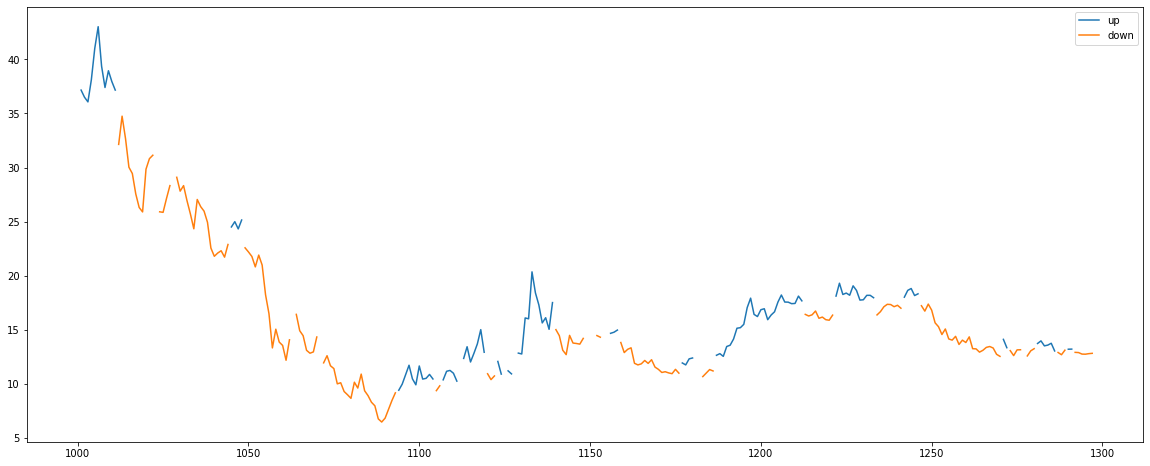

In [97]:
data[['up','down']][1000:].plot(figsize=(20,8))